# Installation

In [1]:
!pip install tensorflow

  Using cached tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
  Using cached tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata (5.0 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.5.4-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.11.0-cp311-cp311-win_amd64.whl.metadata (2.5 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached ml_dtypes-0.3.2-cp311-cp311-win_amd64.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.62.2-cp311-cp311-win_amd64.whl.metadata (4.2 kB)
  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)

In [414]:
!pip install opencv-python

   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB 495.5 kB/s eta 0:01:18
   ---------------------------------------- 0.1/38.6 MB 939.4 kB/s eta 0:00:41
   ---------------------------------------- 0.2/38.6 MB 1.2 MB/s eta 0:00:31
   ---------------------------------------- 0.3/38.6 MB 1.6 MB/s eta 0:00:24
   ---------------------------------------- 0.5/38.6 MB 1.7 MB/s eta 0:00:23
    --------------------------------------- 0.6/38.6 MB 2.0 MB/s eta 0:00:19
    --------------------------------------- 0.8/38.6 MB 2.1 MB/s eta 0:00:18
    --------------------------------------- 0.9/38.6 MB 2.3 MB/s eta 0:00:17
   - -------------------------------------- 1.1/38.6 MB 2.4 MB/s eta 0:00:16
   - -------------------------------------- 1.2/38.6 MB 2.4 MB/s eta 0:00:16
   - -------------------------------------- 1.4/38.6 MB 2.5 MB/s eta 0:00:15
   - ----

# Importing Library

In [1]:
import os
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from PIL import Image
from sklearn.preprocessing import LabelEncoder
import numpy as np
from collections import Counter
import glob
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from keras import optimizers
from keras.callbacks import ModelCheckpoint

# Setup Dataset

In [2]:
train_img_dir= './dataset-road-sign/dataset/train/images'
train_labels_dir= './dataset-road-sign/dataset/train/labels'

In [3]:
labels_file_name=os.listdir(path= train_labels_dir)
labels_file_name.sort()

In [4]:
labels_file_name[:5] 

['0_10000_1577671998-6491628_png.rf.4409e33e7139017076f20ce4c9cbb447.txt',
 '0_10002_1577671998-65016_png.rf.97341bd5205d3d5a489ee79ac3945bda.txt',
 '0_10002_1577671998-65016_png.rf.a6e7cdee58f3b50a61bec46979c23668.txt',
 '0_10005_1577671998-6531546_png.rf.ea37b6317b8fd833dc6eae0d7eea7772.txt',
 '0_10006_1577671998-6541514_png.rf.455fb603ab951eaedb4f1dc13db6de35.txt']

# Preprocessing Label

In [5]:
# mengambil angka awal pada file. cth: 0_9961_1577671998-6192439_png.rf.9d22ece280a1fbe3e471fc1155faf787.txt
# maka hasil nya 0 dan ditampung ke dalam array labels, klasifikasi bisa dilihat dalam label_mapping
labels=[]
for label in labels_file_name:
    sp=label.split('_')[0] or label.split('-')[0] 
    labels.append(sp)

In [6]:
# Menghitung frekuensi setiap label
label_counts = Counter(labels)

# Mencetak frekuensi setiap label
for label, count in label_counts.items():
    print(f"Label '{label}' muncul {count} kali")

Label '0' muncul 194 kali
Label '14' muncul 220 kali
Label '1' muncul 250 kali
Label '2' muncul 251 kali
Label '3' muncul 243 kali
Label '4' muncul 247 kali
Label '5' muncul 249 kali
Label '7' muncul 267 kali
Label '8' muncul 264 kali
Label 'Screenshot-2024-02-10-002755' muncul 1 kali
Label 'Screenshot-2024-02-10-0028332' muncul 2 kali
Label 'Screenshot-2024-02-10-002833' muncul 2 kali
Label 'Screenshot-2024-02-10-003018' muncul 2 kali
Label 'Screenshot-2024-02-10-003045' muncul 2 kali
Label 'Screenshot-2024-02-10-003150' muncul 1 kali
Label 'Screenshot-2024-02-10-003214' muncul 1 kali
Label 'Screenshot-2024-02-10-003237' muncul 1 kali
Label 'Screenshot-2024-02-10-003423' muncul 2 kali
Label 'Screenshot-2024-02-10-003448' muncul 1 kali
Label 'Screenshot-2024-02-10-003608' muncul 1 kali
Label 'Screenshot-2024-02-10-003634' muncul 1 kali
Label 'Screenshot-2024-02-10-003703' muncul 1 kali
Label 'Screenshot-2024-02-10-003810' muncul 1 kali
Label 'Screenshot-2024-02-10-003842' muncul 2 kali

In [7]:
labelss= []
for label in labels:
    sp=label.split('-')[0] 
    labelss.append(sp)

In [8]:
# Menghitung frekuensi setiap label
label_counts = Counter(labelss)

# Mencetak frekuensi setiap label
for label, count in label_counts.items():
    print(f"Label '{label}' muncul {count} kali")

Label '0' muncul 194 kali
Label '14' muncul 220 kali
Label '1' muncul 250 kali
Label '2' muncul 251 kali
Label '3' muncul 243 kali
Label '4' muncul 247 kali
Label '5' muncul 249 kali
Label '7' muncul 267 kali
Label '8' muncul 264 kali
Label 'Screenshot' muncul 41 kali


In [9]:
total_labelss = len(labelss)
print(f"Total keseluruhan label adalah {total_labelss}")

Total keseluruhan label adalah 2226


In [10]:
# membalikan ke dalam variabel labels untuk mempermudah, labelss sudah tidak dipakai
labels = labelss

In [11]:
encoder= LabelEncoder()
encoder.fit_transform(labels)

array([0, 0, 0, ..., 9, 9, 9], dtype=int64)

In [12]:
labels=np.array(labels, dtype='object')

In [13]:
labels

array(['0', '0', '0', ..., 'Screenshot', 'Screenshot', 'Screenshot'],
      dtype=object)

In [14]:
labels[labels=='Screenshot']='14'
encoder= LabelEncoder()
labels=encoder.fit_transform(labels)

In [15]:
# Menghitung frekuensi setiap label
label_counts = Counter(labels)

# Mencetak frekuensi setiap label
for label, count in label_counts.items():
    print(f"Label '{label}' muncul {count} kali")

Label '0' muncul 194 kali
Label '2' muncul 261 kali
Label '1' muncul 250 kali
Label '3' muncul 251 kali
Label '4' muncul 243 kali
Label '5' muncul 247 kali
Label '6' muncul 249 kali
Label '7' muncul 267 kali
Label '8' muncul 264 kali


In [16]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [17]:
label_mapping = {0: 'SPEED LIMIT 20', 
                 1: 'SPEED LIMIT 30', 
                 2: 'STOP', 
                 3: 'SPEED LIMIT 50', 
                 4: 'SPEED-LIMIT-60', 
                 5: 'SPEED LIMIT 70', 
                 6: 'SPEED-LIMIT-80', 
                 7: 'SPEED LIMIT 100', 
                 8: 'SPEED LIMIT 120'}

In [18]:
y= labels
y_main_labels = [label_mapping[label] for label in y]

In [19]:
encoder= LabelEncoder()
labels=encoder.fit_transform(y_main_labels)

In [20]:
# Menghitung frekuensi setiap label
label_counts = Counter(y_main_labels)

# Mencetak frekuensi setiap label
for label, count in label_counts.items():
    print(f"Label '{label}' muncul {count} kali")

Label 'SPEED LIMIT 20' muncul 194 kali
Label 'STOP' muncul 261 kali
Label 'SPEED LIMIT 30' muncul 250 kali
Label 'SPEED LIMIT 50' muncul 251 kali
Label 'SPEED-LIMIT-60' muncul 243 kali
Label 'SPEED LIMIT 70' muncul 247 kali
Label 'SPEED-LIMIT-80' muncul 249 kali
Label 'SPEED LIMIT 100' muncul 267 kali
Label 'SPEED LIMIT 120' muncul 264 kali


# Preprocessing Img

In [21]:
images_path_names= glob.glob(os.path.join(train_img_dir,'*'))
images_path_names[:5]

['./dataset-road-sign/dataset/train/images\\0_10000_1577671998-6491628_png.rf.4409e33e7139017076f20ce4c9cbb447.jpg',
 './dataset-road-sign/dataset/train/images\\0_10002_1577671998-65016_png.rf.97341bd5205d3d5a489ee79ac3945bda.jpg',
 './dataset-road-sign/dataset/train/images\\0_10002_1577671998-65016_png.rf.a6e7cdee58f3b50a61bec46979c23668.jpg',
 './dataset-road-sign/dataset/train/images\\0_10005_1577671998-6531546_png.rf.ea37b6317b8fd833dc6eae0d7eea7772.jpg',
 './dataset-road-sign/dataset/train/images\\0_10006_1577671998-6541514_png.rf.455fb603ab951eaedb4f1dc13db6de35.jpg']

In [22]:
images_path_names.sort()
images_path_names[:5]

['./dataset-road-sign/dataset/train/images\\0_10000_1577671998-6491628_png.rf.4409e33e7139017076f20ce4c9cbb447.jpg',
 './dataset-road-sign/dataset/train/images\\0_10002_1577671998-65016_png.rf.97341bd5205d3d5a489ee79ac3945bda.jpg',
 './dataset-road-sign/dataset/train/images\\0_10002_1577671998-65016_png.rf.a6e7cdee58f3b50a61bec46979c23668.jpg',
 './dataset-road-sign/dataset/train/images\\0_10005_1577671998-6531546_png.rf.ea37b6317b8fd833dc6eae0d7eea7772.jpg',
 './dataset-road-sign/dataset/train/images\\0_10006_1577671998-6541514_png.rf.455fb603ab951eaedb4f1dc13db6de35.jpg']

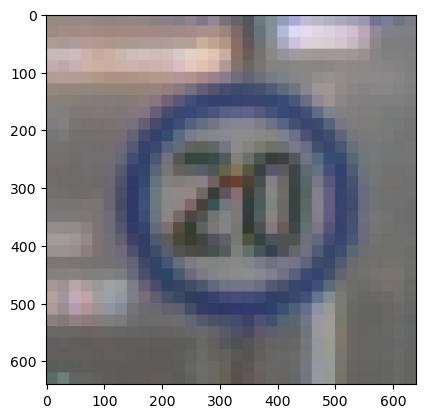

In [23]:
# check, apakah data sudah masuk dan bisa ditampilkan
img=plt.imread(images_path_names[0])
plt.imshow(img)

In [24]:
preprocessed_images=[]
for image_file in images_path_names:
    img= cv2.imread(image_file) #membaca gambar
    img= cv2.resize(img,(96,96)) #merubah ukurannya menjadi 96x96 piksel
    img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #format warna gambar dari BGR ke RGB
    img= img.astype('float32')/255 #untuk mengubah nilai piksel dari rentang [0, 255] menjadi [0, 1]
    
    preprocessed_images.append(img)

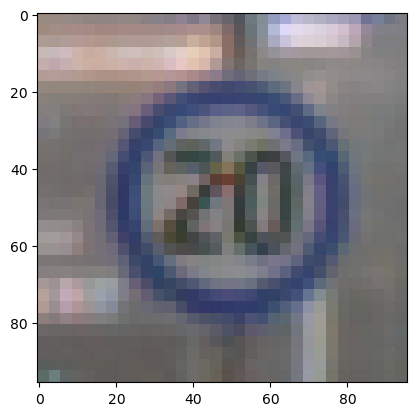

In [25]:
plt.imshow(preprocessed_images[0])

In [26]:
X= np.array(preprocessed_images) # diubah menjadi array Numpy

# Desain CNN

In [27]:
X.shape #(banyaknya_data, ukuran_pixel, ukuran_pixel, 3_chanel_warna_(RGB))

(2226, 96, 96, 3)

In [28]:
y.shape

(2226,)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)

# Konfigurasi

## 1 Convolutional Layer, 1 max pooling, 2 FC

In [30]:
def build_model_a():
    model = Sequential([
        Input(shape=(96, 96, 3)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(2, 2, padding='same'),
        Flatten(),
        Dense(9, activation='softmax')
    ])
    return model

##  2 Convolutional Layer, 1 max pooling, 2 FC

In [31]:
def build_model_b():
    model = Sequential([
        Input(shape=(96, 96, 3)),
        Conv2D(32, (3, 3), activation='relu'),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2, padding='same'),
        Flatten(),
        Dense(9, activation='softmax')
    ])
    return model

## 3 Convolutional Layer, 2 max pooling, 2 FC

In [32]:
def build_model_c():
    model = Sequential([
        Input(shape=(96, 96, 3)),
        Conv2D(32, (3, 3), activation='relu'),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2, padding='same'),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2, padding='same'),
        Flatten(),
        Dense(9, activation='softmax')
    ])
    return model

## 4 Convolutional Layer, 2 max pooling, 2 FC 

In [33]:
def build_model_d():
    model = Sequential([
        Input(shape=(96, 96, 3)),
        Conv2D(32, (3, 3), activation='relu'),
        Conv2D(64, (3, 3), activation='relu'),
        Conv2D(128, (3, 3), activation='relu'),
        Conv2D(256, (3, 3), activation='relu'),
        MaxPooling2D(2, 2, padding='same'),
        MaxPooling2D(2, 2, padding='same'),
        Flatten(),
        Dense(9, activation='softmax')
    ])
    return model

## Optimizer (SGD)

In [34]:
def compile_model(model):
    lr_schedule= optimizers.schedules.ExponentialDecay(initial_learning_rate=0.0001,
                                                 decay_steps=10000,
                                                 decay_rate=2)
    
    sgd_optimizer = optimizers.SGD(learning_rate=lr_schedule)
    
    model.compile(optimizer=sgd_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [35]:
model_a = build_model_a()
model_a = compile_model(model_a)
model_a.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 94, 94, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 47, 47, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 70688)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 9)              │       636,201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 637,097 (2.43 MB)

 Trainable params: 637,097 (2.43 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model_b = build_model_b()
model_b = compile_model(model_b)
model_b.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 94, 94, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 92, 92, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 46, 46, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 135424)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │     1,218,825 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,238,217 (4.72 MB)

 Trainable params: 1,238,217 (4.72 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model_c = build_model_c()
model_c = compile_model(model_c)
model_c.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 94, 94, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 92, 92, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 46, 46, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 44, 44, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 61952)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 9)              │       557,577 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 650,825 (2.48 MB)

 Trainable params: 650,825 (2.48 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model_d = build_model_d()
model_d = compile_model(model_d)
model_d.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 94, 94, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 92, 92, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 90, 90, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 88, 88, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 44, 44, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 22, 22, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 123904)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 9)              │     1,115,145 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,503,561 (5.74 MB)

 Trainable params: 1,503,561 (5.74 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
# Digunakan untuk menyimpan model atau melakukan tindakan tertentu ketika kondisi tertentu terpenuhi selama pelatihan
# Monitor validation loss
checkpoint_loss = ModelCheckpoint('checkpoint_loss.keras',
                                  monitor='val_loss',
                                  verbose=1,
                                  save_best_only=True)
    
# Monitor validation accuracy
checkpoint_accuracy = ModelCheckpoint('checkpoint_accuracy.keras',
                                      monitor='val_accuracy',
                                      verbose=1,
                                      save_best_only=True)

## Execulte with config Epoch=50, batch size=100

In [43]:
%%time
history_a = model_a.fit(X_train, y_train, batch_size=100, epochs=50, validation_data=(X_test,y_test), callbacks=[checkpoint_accuracy,checkpoint_loss])

Epoch 1/50
20/21 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.3412 - loss: 1.8796
Epoch 1: val_accuracy did not improve from 0.32287

Epoch 1: val_loss did not improve from 1.88205
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - accuracy: 0.3397 - loss: 1.8823 - val_accuracy: 0.3094 - val_loss: 1.8828
Epoch 2/50
20/21 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.3097 - loss: 1.9058
Epoch 2: val_accuracy did not improve from 0.32287

Epoch 2: val_loss did not improve from 1.88205
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - accuracy: 0.3107 - loss: 1.9058 - val_accuracy: 0.3094 - val_loss: 1.8847
Epoch 3/50
20/21 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.3400 - loss: 1.8878
Epoch 3: val_accuracy did not improve from 0.32287

Epoch 3: val_loss improved from 1.88205 to 1.87844, saving model to checkpoint_loss.keras
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - accuracy: 0.3391 - loss: 1.8892 - val_accuracy: 0.3139 - val_loss: 1.8784
Epoch 4/50
20/21 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step

21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - accuracy: 0.3722 - loss: 1.8477 - val_accuracy: 0.3274 - val_loss: 1.8502
Epoch 22/50
20/21 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.3388 - loss: 1.8751
Epoch 22: val_accuracy did not improve from 0.34081

Epoch 22: val_loss improved from 1.85017 to 1.84450, saving model to checkpoint_loss.keras
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - accuracy: 0.3387 - loss: 1.8746 - val_accuracy: 0.3318 - val_loss: 1.8445
Epoch 23/50
20/21 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.3356 - loss: 1.8841
Epoch 23: val_accuracy did not improve from 0.34081

Epoch 23: val_loss did not improve from 1.84450
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - accuracy: 0.3353 - loss: 1.8826 - val_accuracy: 0.3229 - val_loss: 1.8482
Epoch 24/50
20/21 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.3544 - loss: 1.8431
Epoch 24: val_accuracy did not improve from 0.34081

Epoch 24: val_loss did not improve from 1.84450
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step -

20/21 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.3621 - loss: 1.8357
Epoch 42: val_accuracy did not improve from 0.34978

Epoch 42: val_loss did not improve from 1.81118
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - accuracy: 0.3627 - loss: 1.8355 - val_accuracy: 0.3453 - val_loss: 1.8151
Epoch 43/50
20/21 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.3593 - loss: 1.8296
Epoch 43: val_accuracy did not improve from 0.34978

Epoch 43: val_loss did not improve from 1.81118
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - accuracy: 0.3594 - loss: 1.8298 - val_accuracy: 0.3363 - val_loss: 1.8140
Epoch 44/50
20/21 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.3748 - loss: 1.8242
Epoch 44: val_accuracy did not improve from 0.34978

Epoch 44: val_loss improved from 1.81118 to 1.80681, saving model to checkpoint_loss.keras
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step - accuracy: 0.3734 - loss: 1.8248 - val_accuracy: 0.3363 - val_loss: 1.8068
Epoch 45/50
20/21 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step -

In [44]:
%%time
history_b = model_b.fit(X_train, y_train, batch_size=100, epochs=50, validation_data=(X_test,y_test), callbacks=[checkpoint_accuracy,checkpoint_loss])

Epoch 1/50
20/21 ━━━━━━━━━━━━━━━━━━━━ 0s 735ms/step - accuracy: 0.0913 - loss: 2.2200
Epoch 1: val_accuracy did not improve from 0.35426

Epoch 1: val_loss did not improve from 1.79686
21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 730ms/step - accuracy: 0.0921 - loss: 2.2192 - val_accuracy: 0.1166 - val_loss: 2.2068
Epoch 2/50
20/21 ━━━━━━━━━━━━━━━━━━━━ 0s 740ms/step - accuracy: 0.1073 - loss: 2.1994
Epoch 2: val_accuracy did not improve from 0.35426

Epoch 2: val_loss did not improve from 1.79686
21/21 ━━━━━━━━━━━━━━━━━━━━ 15s 725ms/step - accuracy: 0.1083 - loss: 2.1990 - val_accuracy: 0.1166 - val_loss: 2.1928
Epoch 3/50
20/21 ━━━━━━━━━━━━━━━━━━━━ 0s 728ms/step - accuracy: 0.1339 - loss: 2.1881
Epoch 3: val_accuracy did not improve from 0.35426

Epoch 3: val_loss did not improve from 1.79686
21/21 ━━━━━━━━━━━━━━━━━━━━ 15s 714ms/step - accuracy: 0.1351 - loss: 2.1876 - val_accuracy: 0.1345 - val_loss: 2.1829
Epoch 4/50
20/21 ━━━━━━━━━━━━━━━━━━━━ 0s 730ms/step - accuracy: 0.1740 - loss: 2.1744
Epoch

Epoch 23/50
20/21 ━━━━━━━━━━━━━━━━━━━━ 0s 765ms/step - accuracy: 0.2120 - loss: 2.0858
Epoch 23: val_accuracy did not improve from 0.35426

Epoch 23: val_loss did not improve from 1.79686
21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 751ms/step - accuracy: 0.2116 - loss: 2.0865 - val_accuracy: 0.1839 - val_loss: 2.0891
Epoch 24/50
20/21 ━━━━━━━━━━━━━━━━━━━━ 0s 827ms/step - accuracy: 0.2074 - loss: 2.0912
Epoch 24: val_accuracy did not improve from 0.35426

Epoch 24: val_loss did not improve from 1.79686
21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 809ms/step - accuracy: 0.2080 - loss: 2.0911 - val_accuracy: 0.1839 - val_loss: 2.0860
Epoch 25/50
20/21 ━━━━━━━━━━━━━━━━━━━━ 0s 806ms/step - accuracy: 0.2040 - loss: 2.0905
Epoch 25: val_accuracy did not improve from 0.35426

Epoch 25: val_loss did not improve from 1.79686
21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 789ms/step - accuracy: 0.2043 - loss: 2.0902 - val_accuracy: 0.1794 - val_loss: 2.0846
Epoch 26/50
20/21 ━━━━━━━━━━━━━━━━━━━━ 0s 788ms/step - accuracy: 0.2060 - loss: 2.

Epoch 45/50
20/21 ━━━━━━━━━━━━━━━━━━━━ 0s 822ms/step - accuracy: 0.2431 - loss: 2.0375
Epoch 45: val_accuracy did not improve from 0.35426

Epoch 45: val_loss did not improve from 1.79686
21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 805ms/step - accuracy: 0.2437 - loss: 2.0368 - val_accuracy: 0.2422 - val_loss: 2.0230
Epoch 46/50
20/21 ━━━━━━━━━━━━━━━━━━━━ 0s 817ms/step - accuracy: 0.2513 - loss: 2.0296
Epoch 46: val_accuracy did not improve from 0.35426

Epoch 46: val_loss did not improve from 1.79686
21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 800ms/step - accuracy: 0.2509 - loss: 2.0294 - val_accuracy: 0.2422 - val_loss: 2.0192
Epoch 47/50
20/21 ━━━━━━━━━━━━━━━━━━━━ 0s 825ms/step - accuracy: 0.2511 - loss: 2.0228
Epoch 47: val_accuracy did not improve from 0.35426

Epoch 47: val_loss did not improve from 1.79686
21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 806ms/step - accuracy: 0.2516 - loss: 2.0229 - val_accuracy: 0.2556 - val_loss: 2.0139
Epoch 48/50
20/21 ━━━━━━━━━━━━━━━━━━━━ 0s 798ms/step - accuracy: 0.2689 - loss: 2.

In [45]:
%%time
history_c = model_c.fit(X_train, y_train, batch_size=100, epochs=50, validation_data=(X_test,y_test), callbacks=[checkpoint_accuracy,checkpoint_loss])

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1105 - loss: 2.1996
Epoch 1: val_accuracy did not improve from 0.35426

Epoch 1: val_loss did not improve from 1.79686
21/21 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.1106 - loss: 2.1995 - val_accuracy: 0.0628 - val_loss: 2.1940
Epoch 2/50
20/21 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1099 - loss: 2.1954
Epoch 2: val_accuracy did not improve from 0.35426

Epoch 2: val_loss did not improve from 1.79686
21/21 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.1095 - loss: 2.1953 - val_accuracy: 0.0762 - val_loss: 2.1912
Epoch 3/50
20/21 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1055 - loss: 2.1925
Epoch 3: val_accuracy did not improve from 0.35426

Epoch 3: val_loss did not improve from 1.79686
21/21 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.1063 - loss: 2.1925 - val_accuracy: 0.0852 - val_loss: 2.1883
Epoch 4/50
20/21 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1175 - loss: 2.1907
Epoch 4: val_accuracy did 


Epoch 23: val_loss did not improve from 1.79686
21/21 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.1618 - loss: 2.1556 - val_accuracy: 0.1570 - val_loss: 2.1542
Epoch 24/50
20/21 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1563 - loss: 2.1601
Epoch 24: val_accuracy did not improve from 0.35426

Epoch 24: val_loss did not improve from 1.79686
21/21 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.1568 - loss: 2.1594 - val_accuracy: 0.1570 - val_loss: 2.1533
Epoch 25/50
20/21 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1468 - loss: 2.1549
Epoch 25: val_accuracy did not improve from 0.35426

Epoch 25: val_loss did not improve from 1.79686
21/21 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.1485 - loss: 2.1546 - val_accuracy: 0.1614 - val_loss: 2.1515
Epoch 26/50
20/21 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1683 - loss: 2.1477
Epoch 26: val_accuracy did not improve from 0.35426

Epoch 26: val_loss did not improve from 1.79686
21/21 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 

Epoch 46/50
20/21 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1852 - loss: 2.1270
Epoch 46: val_accuracy did not improve from 0.35426

Epoch 46: val_loss did not improve from 1.79686
21/21 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.1860 - loss: 2.1271 - val_accuracy: 0.1749 - val_loss: 2.1287
Epoch 47/50
20/21 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1943 - loss: 2.1234
Epoch 47: val_accuracy did not improve from 0.35426

Epoch 47: val_loss did not improve from 1.79686
21/21 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.1939 - loss: 2.1236 - val_accuracy: 0.1749 - val_loss: 2.1278
Epoch 48/50
20/21 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2068 - loss: 2.1189
Epoch 48: val_accuracy did not improve from 0.35426

Epoch 48: val_loss did not improve from 1.79686
21/21 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.2055 - loss: 2.1195 - val_accuracy: 0.1749 - val_loss: 2.1270
Epoch 49/50
20/21 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1895 - loss: 2.1291
Epoch 49: val_ac

In [ ]:
%%time
history_d = model_d.fit(X_train, y_train, batch_size=100, epochs=50, validation_data=(X_test,y_test), callbacks=[checkpoint_accuracy,checkpoint_loss])

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16s/step - accuracy: 0.0857 - loss: 2.2031 
Epoch 1: val_accuracy did not improve from 0.35426

Epoch 1: val_loss did not improve from 1.79686
21/21 ━━━━━━━━━━━━━━━━━━━━ 355s 17s/step - accuracy: 0.0860 - loss: 2.2030 - val_accuracy: 0.0987 - val_loss: 2.1968
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17s/step - accuracy: 0.0961 - loss: 2.1975 
Epoch 2: val_accuracy did not improve from 0.35426

Epoch 2: val_loss did not improve from 1.79686
21/21 ━━━━━━━━━━━━━━━━━━━━ 358s 17s/step - accuracy: 0.0961 - loss: 2.1976 - val_accuracy: 0.1031 - val_loss: 2.1955
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17s/step - accuracy: 0.0962 - loss: 2.1967 
Epoch 3: val_accuracy did not improve from 0.35426

Epoch 3: val_loss did not improve from 1.79686
21/21 ━━━━━━━━━━━━━━━━━━━━ 365s 17s/step - accuracy: 0.0964 - loss: 2.1967 - val_accuracy: 0.0897 - val_loss: 2.1942
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17s/step - accuracy: 0.1054 - loss: 2.1965 
Epoch 4: val